<a href="https://colab.research.google.com/github/AaravWattal/RRAM-Models/blob/main/FINAL_SET_MDN_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Datasets


In [1]:
# Imports
import numpy as np
import pandas as pd
from time import time

# Scikit-learn stuff
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [2]:
# Get conductange range data from file set_sweep.csv
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/set_sweep.csv", names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,151240.470700,115068.986900
1,2,2.000000e-08,0.5,1.0,123855.302200,124977.565700
2,4,2.000000e-08,0.5,1.5,127236.989700,106676.196700
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645200
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247700
5,10,2.000000e-08,0.5,3.0,97572.302250,92171.401490
6,12,2.000000e-08,0.6,0.5,46314.963040,50373.876070
7,14,2.000000e-08,0.6,1.0,100303.315400,149505.440600
8,16,2.000000e-08,0.6,1.5,212694.720700,75614.854910
9,18,2.000000e-08,0.6,2.0,5747.716015,5608.268993


In [3]:
# data = pd.read_csv("/content/reset_sweep.tsv", sep='\t', names=names)
# data.head(20)

# Data Preprocessing

Let us first convert resistance values (pre-read and post-read) to conductance values, and scale each column so that the maximum value is 1.

In [4]:
# Convert resistance to conductance
data['preread'] = 1 / data['preread']
data['postread'] = 1 / data['postread']

In [5]:
# Creating scaled versions of the columns which have very large or very small scales
data['scaled_pw'] = data['pw'] / np.max(data['pw'])
data['scaled_preread'] = data['preread'] / np.max(data['preread'])
data['scaled_postread'] = data['postread'] / np.max(data['postread'])
data['log_scaled_pw'] = np.log(data['pw'])

In [6]:
# Take a peek at the preprocessed data
data.head(20)

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread,log_scaled_pw
0,0,2.000000e-08,0.5,0.5,0.000007,0.000009,0.01,0.034318,0.044375,-17.727534
1,2,2.000000e-08,0.5,1.0,0.000008,0.000008,0.01,0.041906,0.040857,-17.727534
2,4,2.000000e-08,0.5,1.5,0.000008,0.000009,0.01,0.040792,0.047866,-17.727534
3,6,2.000000e-08,0.5,2.0,0.000011,0.000007,0.01,0.055790,0.038148,-17.727534
4,8,2.000000e-08,0.5,2.5,0.000013,0.000017,0.01,0.068648,0.088728,-17.727534
5,10,2.000000e-08,0.5,3.0,0.000010,0.000011,0.01,0.053194,0.055399,-17.727534
6,12,2.000000e-08,0.6,0.5,0.000022,0.000020,0.01,0.112064,0.101366,-17.727534
7,14,2.000000e-08,0.6,1.0,0.000010,0.000007,0.01,0.051746,0.034154,-17.727534
8,16,2.000000e-08,0.6,1.5,0.000005,0.000013,0.01,0.024402,0.067529,-17.727534
9,18,2.000000e-08,0.6,2.0,0.000174,0.000178,0.01,0.903011,0.910478,-17.727534


### Train Test Split
Here, we make a 75%-25% split of the data into training and testing datasets

In [7]:
# Train-test 75%-25% split
x = data[["scaled_preread","log_scaled_pw","vwl","vbsl"]].to_numpy()
y = data["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
print(x,"\n",y)

[[  0.03431788 -17.72753356   0.5          0.5       ]
 [  0.04190577 -17.72753356   0.5          1.        ]
 [  0.040792   -17.72753356   0.5          1.5       ]
 ...
 [  0.05514082 -17.72753356   0.5          3.        ]
 [  0.07995579 -17.72753356   0.6          0.5       ]
 [  0.05964901 -17.72753356   0.6          1.        ]] 
 [0.04437516 0.04085697 0.04786639 ... 0.07144795 0.06633775 0.04164925]


###Standard Data Fitting Model

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

In [10]:
#  def generate_data(n_samples):
#     epsilon = np.random.normal(size=(n_samples))
#     x_data = np.random.uniform(-10.5, 10.5, n_samples)
#     y_data = 7*np.sin(0.75*x_data) + 0.5*x_data + epsilon
#     return x_data, y_data
    
# n_samples = 9831
# x_data, y_data = generate_data(n_samples)
# print(type(x_data))

n_samples = 32768

In [11]:
n_input = 4
n_hidden = 20
n_output = 1

hidden = nn.Linear(n_input, n_hidden)
hidden.weight.data.fill_(0.01)

network = nn.Sequential(hidden,
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_output))
network = network.cuda()

In [12]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(network.parameters())

In [13]:
X_train

array([[  0.05667327, -13.81551056,   2.3       ,   1.5       ],
       [  0.0324172 , -15.42494847,   3.1       ,   0.5       ],
       [  0.05935437, -13.81551056,   1.        ,   1.        ],
       ...,
       [  0.04290688, -14.73180129,   2.8       ,   1.5       ],
       [  0.05041831, -15.42494847,   2.7       ,   2.        ],
       [  0.14262499, -13.81551056,   1.7       ,   1.5       ]])

In [14]:
type(x)

numpy.ndarray

In [15]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [16]:
def train():
    for epoch in range(10):
        y_pred = network(x_train_variable.float()) # make a prediction
        loss = loss_fn(y_pred, y_train_variable.float()) # compute the loss
        optimizer.zero_grad() # prepare the optimizer
        loss.backward() # compute the contribution of each parameter to the loss
        optimizer.step() # modify the parameters

        if epoch % 1 == 0:
            print(epoch, loss.data)

train()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([24576])) that is different to the input size (torch.Size([24576, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 tensor(0.4948, device='cuda:0')
1 tensor(0.3493, device='cuda:0')
2 tensor(0.2761, device='cuda:0')
3 tensor(0.1288, device='cuda:0')
4 tensor(0.1041, device='cuda:0')
5 tensor(0.1040, device='cuda:0')
6 tensor(0.1039, device='cuda:0')
7 tensor(0.1039, device='cuda:0')
8 tensor(0.1039, device='cuda:0')
9 tensor(0.1039, device='cuda:0')


In [17]:
network.eval()
output = network(x_test_tensor.float())
print(output)

tensor([[0.5333],
        [0.5134],
        [0.4442],
        ...,
        [0.4401],
        [0.4532],
        [0.5144]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [18]:
print(output.flatten())

tensor([0.5333, 0.5134, 0.4442,  ..., 0.4401, 0.4532, 0.5144], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)


In [19]:
squared_error = (((output.flatten() - y_test_tensor)*(output.flatten() - y_test_tensor))/len(output)).sum().data
print(squared_error)

tensor(0.0910, device='cuda:0', dtype=torch.float64)


In [20]:
print(np.sqrt(squared_error.cpu()))

tensor(0.3016, dtype=torch.float64)


In [21]:
del(squared_error)
del(output)

###MDN

In [22]:
class MDN(nn.Module):
    def __init__(self, n_hidden, n_gaussians):
        super(MDN, self).__init__()
        self.z_h = nn.Sequential(
            nn.Linear(4, n_hidden),
            nn.Tanh()
        )
        self.z_pi = nn.Linear(n_hidden, n_gaussians)
        self.z_sigma = nn.Linear(n_hidden, n_gaussians)
        self.z_mu = nn.Linear(n_hidden, n_gaussians)  

    def forward(self, x):
        z_h = self.z_h(x)
        pi = nn.functional.softmax(self.z_pi(z_h), -1)
        sigma = torch.exp(self.z_sigma(z_h))
        mu = self.z_mu(z_h)
        return pi, sigma, mu

In [23]:
oneDivSqrtTwoPI = 1.0 / np.sqrt(2.0*np.pi) # normalization factor for Gaussians
def gaussian_distribution(y, mu, sigma):
    # make |mu|=K copies of y, subtract mu, divide by sigma
    print(y.shape)
    print(mu.shape)
    print(sigma.shape)
    result = (y.expand_as(mu) - mu) * torch.reciprocal(sigma)
    print(result.shape)
    result = -0.5 * (result * result)
    return (torch.exp(result) * torch.reciprocal(sigma)) * oneDivSqrtTwoPI

def mdn_loss_fn(pi, sigma, mu, y):
    result = gaussian_distribution(y, mu, sigma) * pi
    #result = torch.sum(result, dim=1)
    result = -torch.log(result)
    return torch.mean(result)

In [24]:
network = MDN(n_hidden=10, n_gaussians=1)
network = network.cuda()
optimizer = torch.optim.Adam(network.parameters())

In [25]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [26]:
len(y_train)

24576

In [27]:
batch_size = 64
num_batches = int(len(y_train)/batch_size)
# network.fit(X_train, y_train, epochs=300, )

In [28]:
torch.cuda.empty_cache()

In [29]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved

In [33]:
def train_mdn():
    for epoch in range(10000):
      # for batch in range(num_batches):
        pi_variable, sigma_variable, mu_variable = network(x_train_variable.float())
        loss = mdn_loss_fn(pi_variable[:,0], sigma_variable[:,0], mu_variable[:,0], y_train_variable)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(epoch, loss.data)

train_mdn()

Streaming output truncated to the last 5000 lines.
torch.Size([24576])
torch.Size([24576])
tensor(-1.5177, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
9000 tensor(-1.5177, device='cuda:0', dtype=torch.float64)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5178, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5177, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5174, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5170, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-1.5166, device='cuda:0', dtype=torch.float64, g

In [34]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.0504],
        [0.0495],
        [0.0556],
        ...,
        [0.0769],
        [0.0811],
        [0.0613]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.8216],
        [0.8660],
        [0.7406],
        ...,
        [0.1164],
        [0.6621],
        [0.7263]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [35]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(squared_error)
print(np.sqrt(squared_error.item()))

tensor(0.0043, device='cuda:0', dtype=torch.float64)
0.06548536190053375


In [36]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([-0.0397], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([1.0563], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.0076, device='cuda:0', dtype=torch.float64)
tensor(0.9997, device='cuda:0', dtype=torch.float64)
8192
8192


In [37]:
print((mu_variable-y_test_tensor).shape)

torch.Size([8192, 8192])


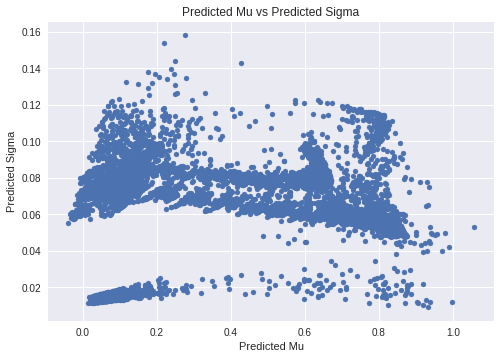

In [38]:
#note: useless graph, this literally serves no purpose
plt.style.use('seaborn')
plt.title("Predicted Mu vs Predicted Sigma")
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25);

1157
1182
1177


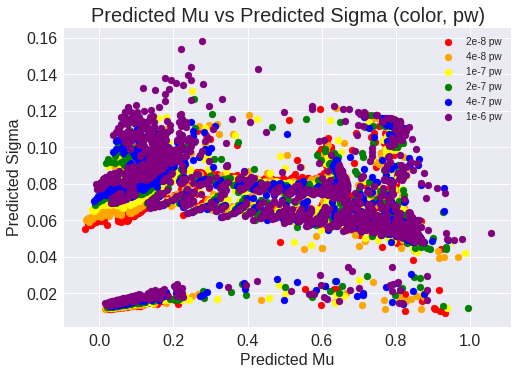

In [43]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
x6 = []
y6 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (-18<X_test[i][1] and X_test[i][1]<-17.5):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (-17.5<X_test[i][1] and X_test[i][1]<-17):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (-17<X_test[i][1] and X_test[i][1]<-16):
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (-16<X_test[i][1] and X_test[i][1]<-15):
      x4.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y4.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (-15<X_test[i][1] and X_test[i][1]<-14):
      x5.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y5.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  else:
      x6.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y6.append(sigma_variable.cpu().detach().numpy()[:,0][i])
      
      
print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("Predicted Mu vs Predicted Sigma (color, pw)", fontsize=20)
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");

plt.scatter(x1, y1, c="red", label='2e-8 pw')
plt.scatter(x2, y2, c="orange", label='4e-8 pw')
plt.scatter(x3, y3, c="yellow", label='1e-7 pw')
plt.scatter(x4, y4, c="green", label='2e-7 pw')
plt.scatter(x5, y5, c="blue", label='4e-7 pw')
plt.scatter(x6, y6, c="purple", label='1e-6 pw')
plt.legend()

1369
1360
1400


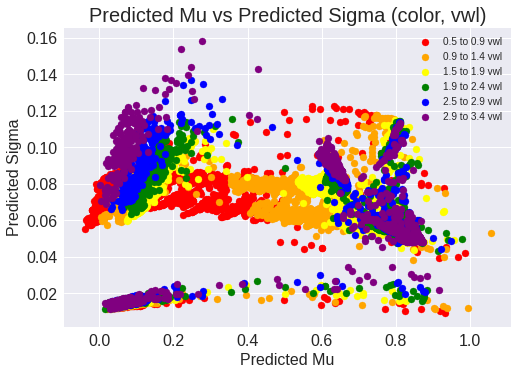

In [44]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
x6 = []
y6 = []

#sort out data into three lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2] and X_test[i][2]<=0.9):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.9<X_test[i][2] and X_test[i][2]<=1.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (1.4<X_test[i][2] and X_test[i][2]<=1.9):
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (1.9<X_test[i][2] and X_test[i][2]<=2.4):
      x4.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y4.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (2.4<X_test[i][2] and X_test[i][2]<=2.9):
      x5.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y5.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  else:
      x6.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y6.append(sigma_variable.cpu().detach().numpy()[:,0][i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("Predicted Mu vs Predicted Sigma (color, vwl)", fontsize=20)
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");

plt.scatter(x1, y1, c="red", label='0.5 to 0.9 vwl')
plt.scatter(x2, y2, c="orange", label='0.9 to 1.4 vwl')
plt.scatter(x3, y3, c="yellow", label='1.5 to 1.9 vwl')
plt.scatter(x4, y4, c="green", label='1.9 to 2.4 vwl')
plt.scatter(x5, y5, c="blue", label='2.5 to 2.9 vwl')
plt.scatter(x6, y6, c="purple", label='2.9 to 3.4 vwl')
plt.legend()

1347
1344
1390


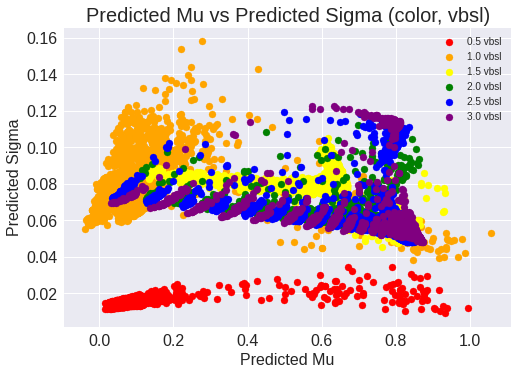

In [45]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
x6 = []
y6 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5):
    x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
    y1.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (X_test[i][3]==1.0):
    x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
    y2.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (X_test[i][3]==1.5):
    x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
    y3.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (X_test[i][3]==2.0):
    x4.append(mu_variable.cpu().detach().numpy()[:,0][i])
    y4.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (X_test[i][3]==2.5):
    x5.append(mu_variable.cpu().detach().numpy()[:,0][i])
    y5.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  else:
    x6.append(mu_variable.cpu().detach().numpy()[:,0][i])
    y6.append(sigma_variable.cpu().detach().numpy()[:,0][i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("Predicted Mu vs Predicted Sigma (color, vbsl)", fontsize=20)
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");

plt.scatter(x1, y1, c="red", label='0.5 vbsl')
plt.scatter(x2, y2, c="orange", label='1.0 vbsl')
plt.scatter(x3, y3, c="yellow", label='1.5 vbsl')
plt.scatter(x4, y4, c="green", label='2.0 vbsl')
plt.scatter(x5, y5, c="blue", label='2.5 vbsl')
plt.scatter(x6, y6, c="purple", label='3.0 vbsl')
plt.legend()

6272
1029
221
57
38
73
130
91
201
80


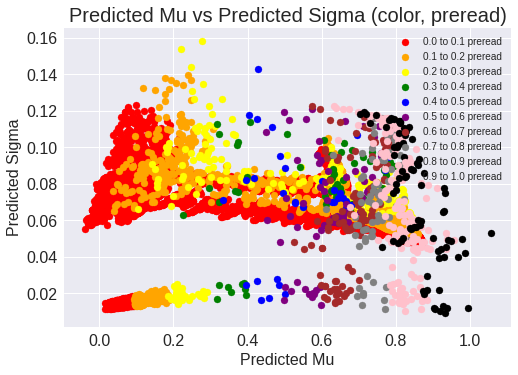

In [47]:
#preread

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
x6 = []
y6 = []
x7 = []
y7 = []
x8 = []
y8 = []
x9 = []
y9 = []
x10 = []
y10 = []

#sort out data into three lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.0<=X_test[i][0] and X_test[i][0]<=0.1):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.1<=X_test[i][0] and X_test[i][0]<=0.2):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.2<=X_test[i][0] and X_test[i][0]<=0.3):
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.3<=X_test[i][0] and X_test[i][0]<=0.4):
      x4.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y4.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.4<=X_test[i][0] and X_test[i][0]<=0.5):
      x5.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y5.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.5<=X_test[i][0] and X_test[i][0]<=0.6):
      x6.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y6.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.6<=X_test[i][0] and X_test[i][0]<=0.7):
      x7.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y7.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.7<=X_test[i][0] and X_test[i][0]<=0.8):
      x8.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y8.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  elif (0.8<=X_test[i][0] and X_test[i][0]<=0.9):
      x9.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y9.append(sigma_variable.cpu().detach().numpy()[:,0][i])
  else:
      x10.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y10.append(sigma_variable.cpu().detach().numpy()[:,0][i])

print(len(x1))
print(len(x2))
print(len(x3))
print(len(x4))
print(len(x5))
print(len(x6))
print(len(x7))
print(len(x8))
print(len(x9))
print(len(x10))


ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("Predicted Mu vs Predicted Sigma (color, preread)", fontsize=20)
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");

plt.scatter(x1, y1, c="red", label='0.0 to 0.1 preread')
plt.scatter(x2, y2, c="orange", label='0.1 to 0.2 preread')
plt.scatter(x3, y3, c="yellow", label='0.2 to 0.3 preread')
plt.scatter(x4, y4, c="green", label='0.3 to 0.4 preread')
plt.scatter(x5, y5, c="blue", label='0.4 to 0.5 preread')
plt.scatter(x6, y6, c="purple", label='0.5 to 0.6 preread')
plt.scatter(x7, y7, c="brown", label='0.6 to 0.7 preread')
plt.scatter(x8, y8, c="gray", label='0.7 to 0.8 preread')
plt.scatter(x9, y9, c="pink", label='0.8 to 0.9 preread')
plt.scatter(x10, y10, c="black", label='0.9 to 1.0 preread')
plt.legend()

In [48]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(8192,)

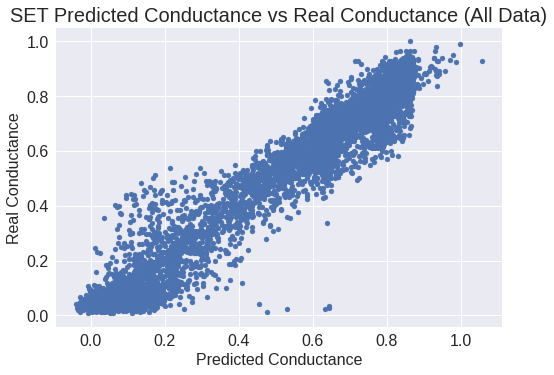

In [49]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All Data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [50]:
#CORRELATION COEFFICIENT
import numpy as np
x = np.array(mu_variable.cpu().detach().numpy()[:,0])
y = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x,y)

array([[1.        , 0.97888695],
       [0.97888695, 1.        ]])

#Color Graphs

0
0
8192


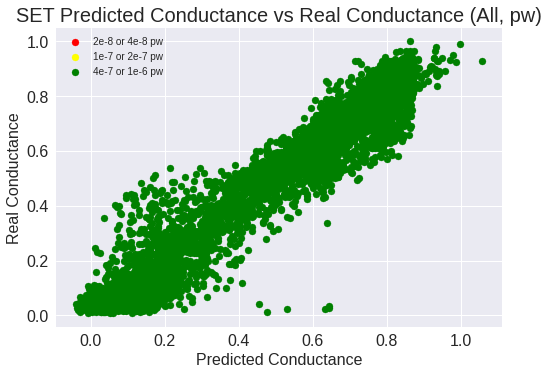

In [51]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]==0.01 or X_test[i][1]==0.02):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][1]==0.05 or X_test[i][1]==0.1):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])
      
print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x1, y1, c="red", label='2e-8 or 4e-8 pw')
plt.scatter(x2, y2, c="yellow", label='1e-7 or 2e-7 pw')
plt.scatter(x3, y3, c="green", label='4e-7 or 1e-6 pw')
plt.legend()

2729
2776
2687


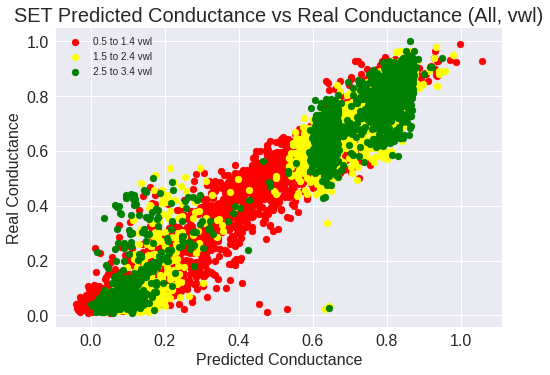

In [52]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into three lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2] and X_test[i][2]<=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2] and X_test[i][2]<=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

2691
2759
2742


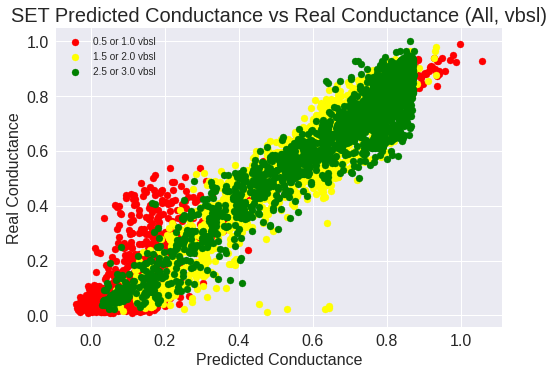

In [53]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (All, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()

#50 PERCENT

In [54]:
subtr_df = data[np.abs(data['scaled_preread'] - data['scaled_postread']) >= 0.5]
subtr_df

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread,log_scaled_pw
46,92,2.000000e-08,1.2,2.5,0.000010,0.000117,0.01,0.052877,0.595374,-17.727534
47,94,2.000000e-08,1.2,3.0,0.000011,0.000130,0.01,0.055367,0.663543,-17.727534
51,102,2.000000e-08,1.3,2.0,0.000007,0.000119,0.01,0.036685,0.607948,-17.727534
52,104,2.000000e-08,1.3,2.5,0.000012,0.000139,0.01,0.062256,0.712036,-17.727534
56,112,2.000000e-08,1.4,1.5,0.000006,0.000113,0.01,0.032252,0.578200,-17.727534
...,...,...,...,...,...,...,...,...,...,...
32753,65506,2.000000e-06,3.3,3.0,0.000017,0.000167,1.00,0.089709,0.852628,-13.122363
32756,65512,2.000000e-06,3.4,1.5,0.000008,0.000124,1.00,0.042824,0.635402,-13.122363
32757,65514,2.000000e-06,3.4,2.0,0.000021,0.000147,1.00,0.108055,0.750463,-13.122363
32758,65516,2.000000e-06,3.4,2.5,0.000005,0.000155,1.00,0.028018,0.793074,-13.122363


In [55]:
# Train-test 70%-30% split
x = subtr_df[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = subtr_df["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [56]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [57]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.1912],
        [0.1203],
        [0.0856],
        ...,
        [0.2274],
        [0.0766],
        [0.1198]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[ 0.4405],
        [-0.0013],
        [ 0.6690],
        ...,
        [ 0.4086],
        [-0.0007],
        [ 0.5680]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [58]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(np.sqrt(squared_error.item()))

0.35541714718759104


In [59]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([-0.3017], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([0.7826], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.5245, device='cuda:0', dtype=torch.float64)
tensor(0.9997, device='cuda:0', dtype=torch.float64)
3576
3576


In [60]:
print((mu_variable-y_test_tensor).shape)

torch.Size([3576, 3576])


In [61]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(3576,)

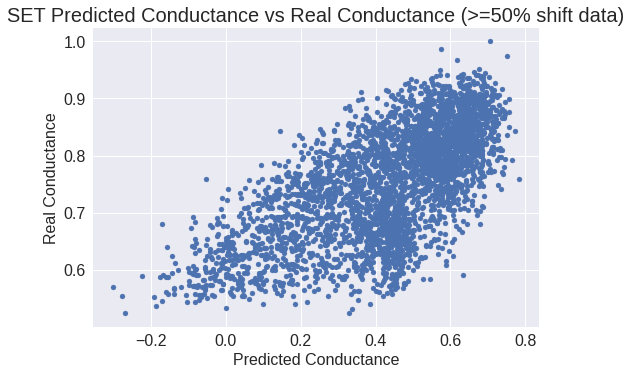

In [62]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (>=50% shift data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [63]:
import numpy as np
x2 = np.array(mu_variable.cpu().detach().numpy()[:,0])
y2 = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x2,y2)

array([[1.        , 0.66386642],
       [0.66386642, 1.        ]])

#Color Graphs

1015
1012
1549


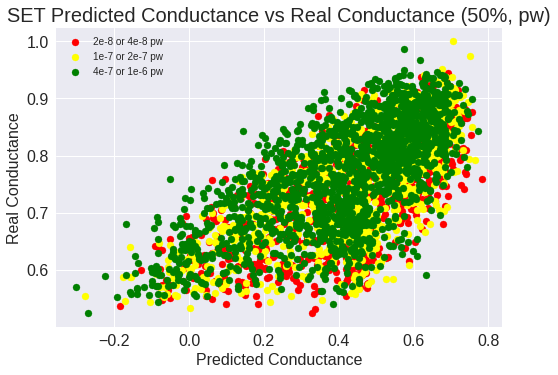

In [64]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]==0.01 or X_test[i][1]==0.02):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][1]==0.05 or X_test[i][1]==0.1):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (50%, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x1, y1, c="red", label='2e-8 or 4e-8 pw')
plt.scatter(x2, y2, c="yellow", label='1e-7 or 2e-7 pw')
plt.scatter(x3, y3, c="green", label='4e-7 or 1e-6 pw')
plt.legend()

435
1508
1633


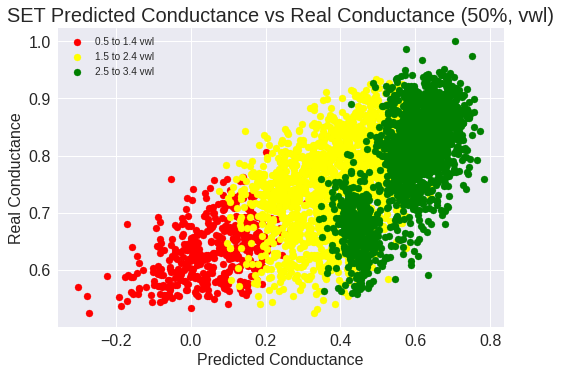

In [65]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2] and X_test[i][2]<=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2] and X_test[i][2]<=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (50%, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

0
1654
1922


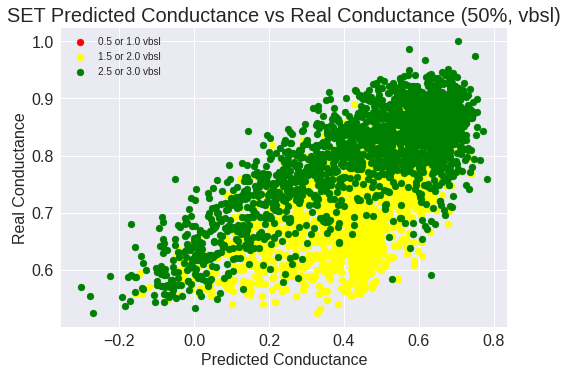

In [66]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (50%, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()

#5 PERCENT

In [67]:
ten_df = data[np.abs(data['scaled_preread'] - data['scaled_postread']) <= 0.05]
ten_df

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread,log_scaled_pw
0,0,2.000000e-08,0.5,0.5,0.000007,0.000009,0.01,0.034318,0.044375,-17.727534
1,2,2.000000e-08,0.5,1.0,0.000008,0.000008,0.01,0.041906,0.040857,-17.727534
2,4,2.000000e-08,0.5,1.5,0.000008,0.000009,0.01,0.040792,0.047866,-17.727534
3,6,2.000000e-08,0.5,2.0,0.000011,0.000007,0.01,0.055790,0.038148,-17.727534
4,8,2.000000e-08,0.5,2.5,0.000013,0.000017,0.01,0.068648,0.088728,-17.727534
...,...,...,...,...,...,...,...,...,...,...
32763,65526,2.000000e-08,0.5,2.0,0.000009,0.000011,0.01,0.047479,0.054263,-17.727534
32764,65528,2.000000e-08,0.5,2.5,0.000009,0.000009,0.01,0.045670,0.045872,-17.727534
32765,65530,2.000000e-08,0.5,3.0,0.000011,0.000014,0.01,0.055141,0.071448,-17.727534
32766,65532,2.000000e-08,0.6,0.5,0.000015,0.000013,0.01,0.079956,0.066338,-17.727534


In [68]:
# Train-test 70%-30% split
x = ten_df[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = ten_df["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [69]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [70]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.2850],
        [0.1100],
        [0.1069],
        ...,
        [0.2885],
        [0.3204],
        [0.4811]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[-0.3563],
        [-0.7237],
        [-0.6945],
        ...,
        [-0.4822],
        [-0.4348],
        [-0.0492]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [71]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(squared_error)
print(np.sqrt(squared_error.item()))

tensor(0.2003, device='cuda:0', dtype=torch.float64)
0.44751515713189005


In [72]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([-0.9296], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([1.3228], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.0082, device='cuda:0', dtype=torch.float64)
tensor(0.9850, device='cuda:0', dtype=torch.float64)
3106
3106


In [73]:
print((mu_variable-y_test_tensor).shape)

torch.Size([3106, 3106])


In [74]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(3106,)

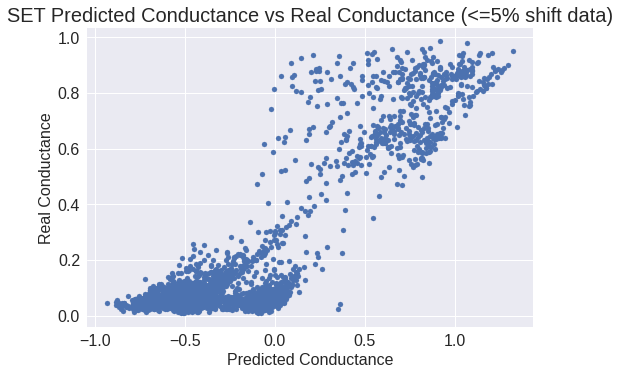

In [75]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (<=5% shift data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [76]:
import numpy as np
x3 = np.array(mu_variable.cpu().detach().numpy()[:,0])
y3 = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x3,y3)

array([[1.        , 0.87071005],
       [0.87071005, 1.        ]])

#Color Graphs

918
898
1290


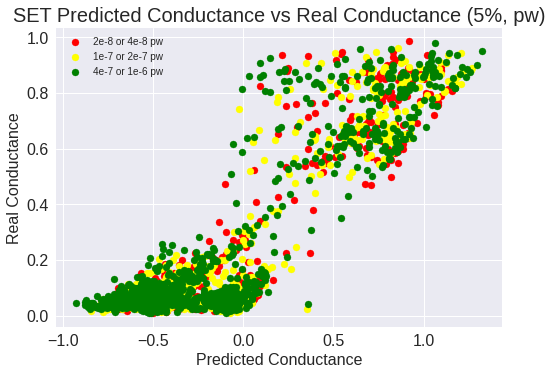

In [77]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]==0.01 or X_test[i][1]==0.02):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][1]==0.05 or X_test[i][1]==0.1):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (5%, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x1, y1, c="red", label='2e-8 or 4e-8 pw')
plt.scatter(x2, y2, c="yellow", label='1e-7 or 2e-7 pw')
plt.scatter(x3, y3, c="green", label='4e-7 or 1e-6 pw')
plt.legend()

1243
942
921


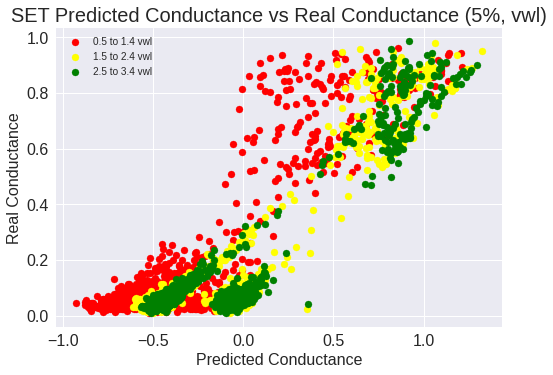

In [78]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2] and X_test[i][2]<=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2] and X_test[i][2]<=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (5%, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

2477
376
253


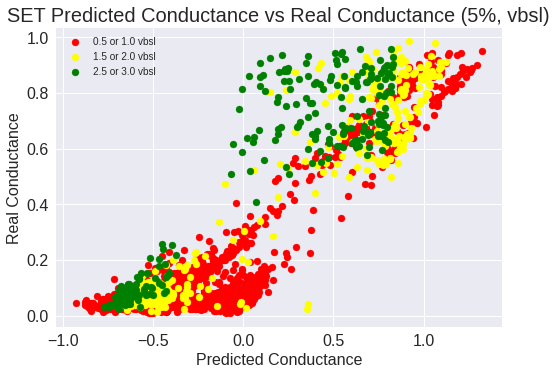

In [79]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("SET Predicted Conductance vs Real Conductance (5%, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()